In [1]:
import json
import os
import base64
import logging
import chromadb
from PIL import Image
import requests
import io
from matplotlib.pyplot import imshow
from chromadb.db.base import UniqueConstraintError

In [2]:
from chromadb.utils.data_loaders import ImageLoader
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

In [3]:
# this may throw errors for further library installations
embedding_function = OpenCLIPEmbeddingFunction()
image_loader = ImageLoader()

In [4]:
# local imagesfor testing
image_urls = ['/Users/akshayranganath/Downloads/mj-panda.jpeg', '/Users/akshayranganath/Downloads/g2.jpeg']
ids = ['/Users/akshayranganath/Downloads/mj-panda.jpeg', '/Users/akshayranganath/Downloads/g2.jpeg']

In [5]:
client = chromadb.PersistentClient(path="data/my_collection")
try:
    collection = client.create_collection(
        name='multimodal_collection',
        embedding_function=embedding_function,
        data_loader=image_loader)
except UniqueConstraintError:
    collection = client.get_collection(
        name = 'multimodal_collection',
        embedding_function=embedding_function,
        data_loader=image_loader
    )


In [6]:
collection.add(ids=ids, uris=image_urls, metadatas=)

ValueError: Expected metadata to be a dict or None, got /Users/akshayranganath/Downloads/mj-panda.jpeg

In [28]:
collection.count()

2

In [9]:
test_image = '/Users/akshayranganath/Downloads/kf1.jpeg'
result = collection.query(query_uris=[test_image])

In [10]:
result

{'ids': [['/Users/akshayranganath/Downloads/mj-panda.jpeg',
   '/Users/akshayranganath/Downloads/g2.jpeg']],
 'distances': [[0.41187603610585705, 1.541196074949538]],
 'metadatas': [[None, None]],
 'embeddings': None,
 'documents': [[None, None]],
 'uris': None,
 'data': None}

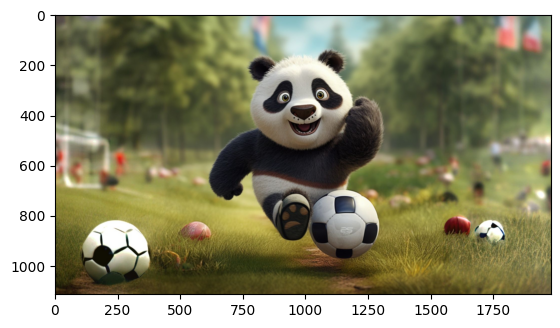

In [31]:
img1 = Image.open(result['ids'][0][0], 'r')
imshow(img1)

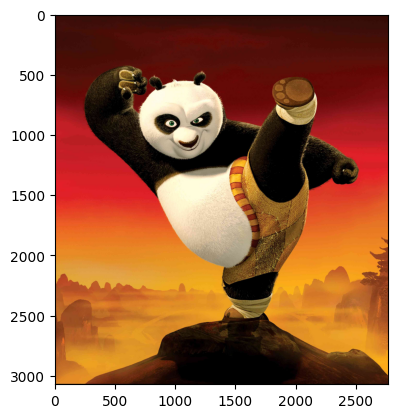

In [32]:
img2 = Image.open(test_image, 'r')
imshow(img2)

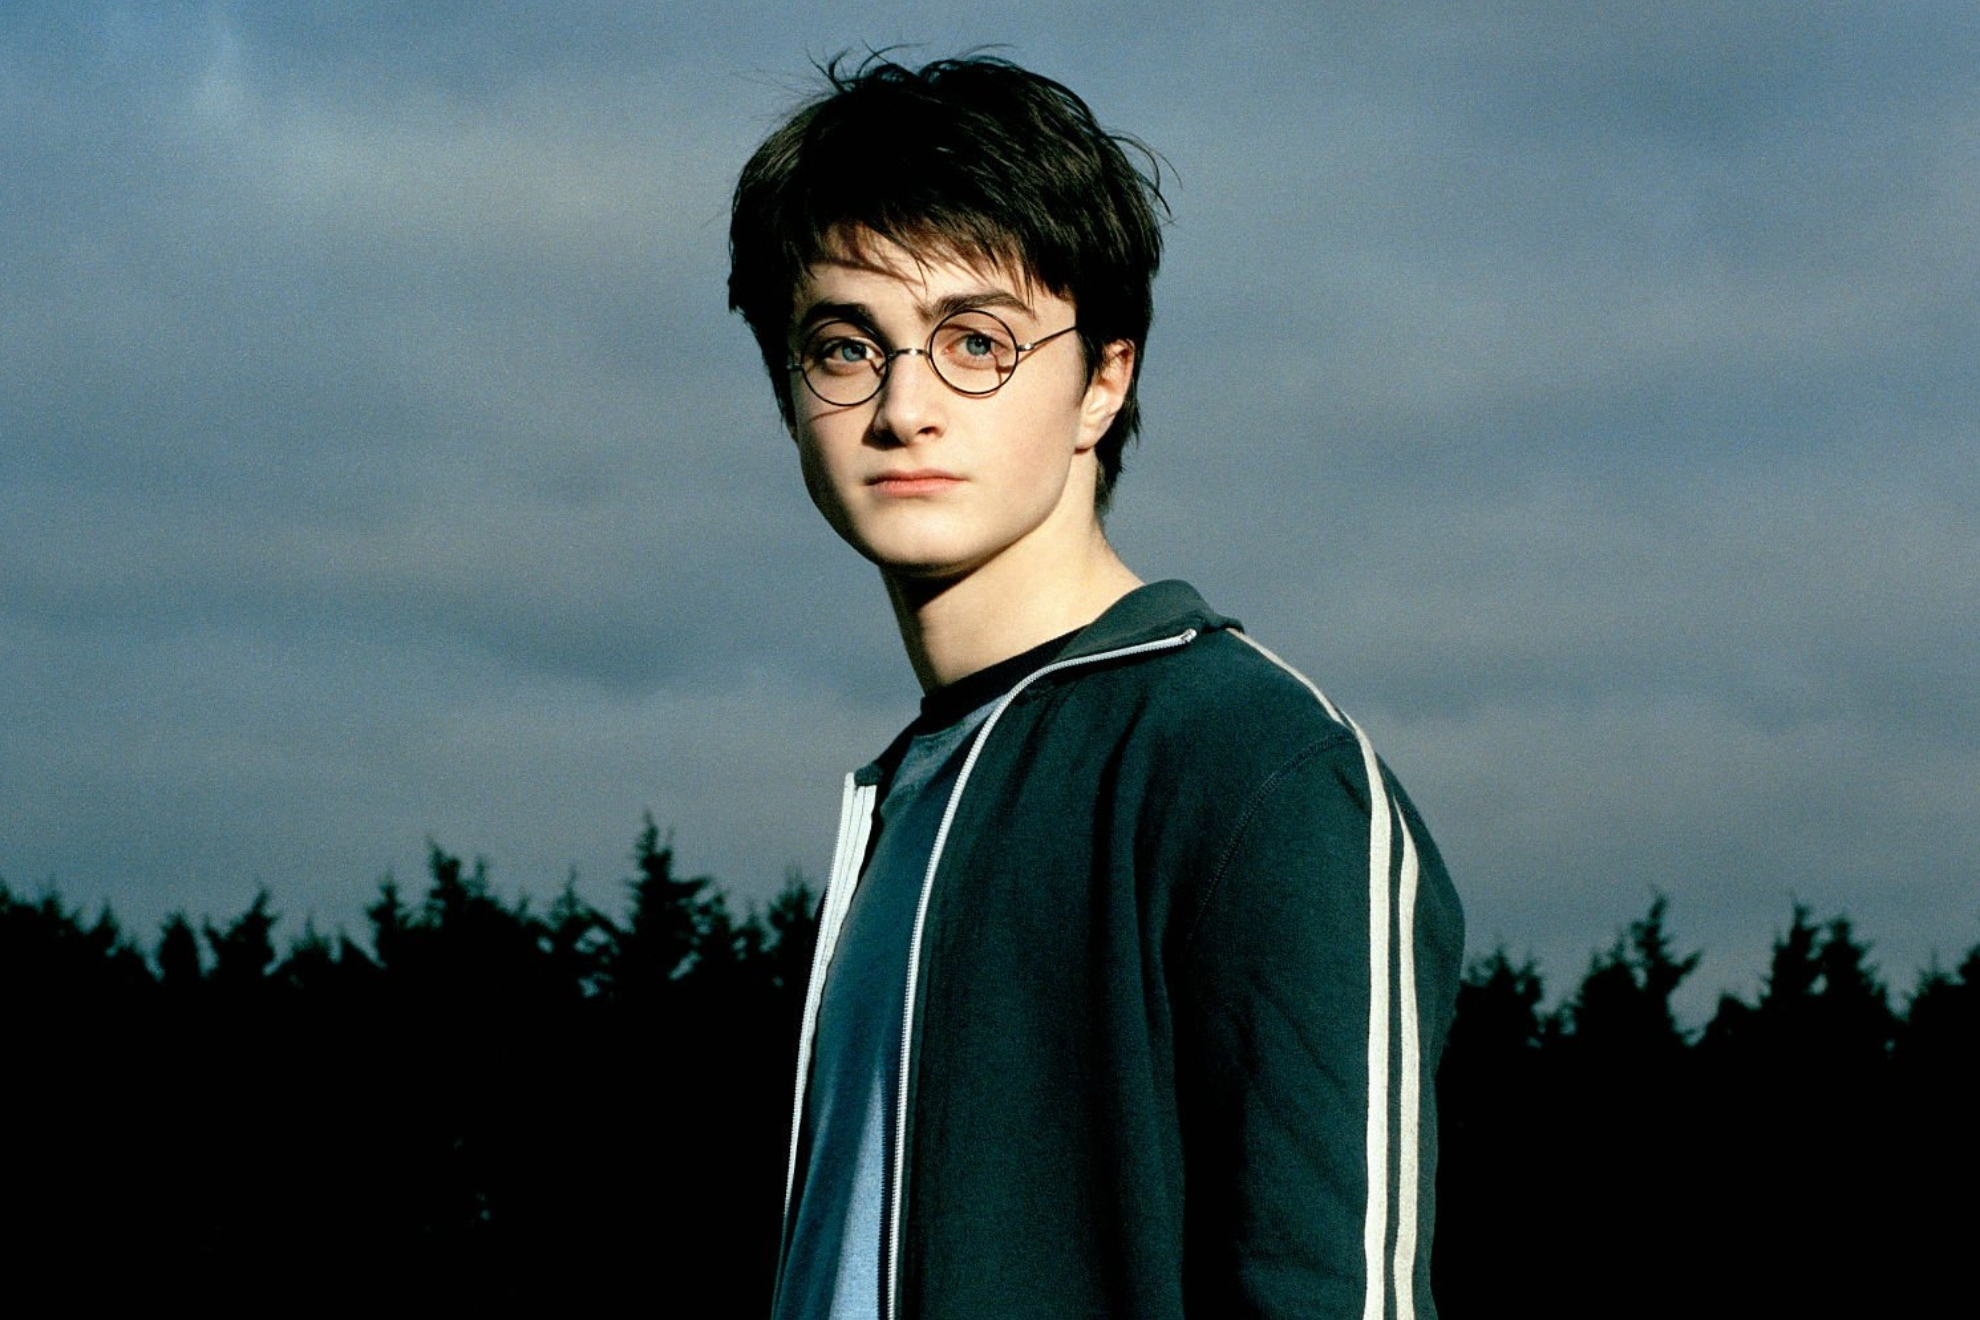

In [37]:
# loading an image from a URL
url = "https://res.cloudinary.com/dbmataac4/image/upload/v1711723124/hp1.jpg"
pil_img = Image.open(requests.get(url, stream=True).raw)
pil_img

In [42]:
# https://stackoverflow.com/questions/3924117/how-to-use-tempfile-namedtemporaryfile-in-python
# https://stackoverflow.com/questions/33101935/convert-pil-image-to-byte-array
import tempfile
with tempfile.NamedTemporaryFile() as temp:
    img_byte_arr = io.BytesIO()
    pil_img.save(img_byte_arr, format=pil_img.format)
    img_byte_arr = img_byte_arr.getvalue()
    temp.write(img_byte_arr)
    temp.flush()
    print(temp)
    
    # now use the temp file for loading the image to index.
    #collection.add(ids=['hp1'], uris=[temp])
    

In [44]:
# simple save to a file
pil_img.save(f'test.{pil_img.format}', pil_img.format)